Problem Statement

In the fast-paced taxi booking sector, making the most ofrevenue is essential for long-term success and driverhappiness.

Our goal is to use data-driven insights to maximiserevenue streams for taxi drivers in order to meet this need.Our research aims to determine whether paymentmethods have an impact on fare pricing by focusing on therelationship between payment type and fare amount..

Research Question

Is there a relationship between total fare amount and payment type

Can we nudge customers towards payment methods that generate higher revenue for drivwithout negatively mpacting customer experience?

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy import stats
import warnings 
import statsmodels.api as sm
warnings.filterwarnings('ignore')

loading the data

In [8]:
# In the extract step, we're reading data from the CSV file named "project1.csv" using the pd.read_csv() function from the Pandas library. 
# This function reads the data and stores it in a DataFrame named beml_df. The print(data.head(10)) statement displays the first 5 rows of 
# the DataFrame, giving us a glimpse of the data we've just extracted.

In [11]:
data=pd.read_csv('project1.csv')
data.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,1/1/2020 0:28,1/1/2020 0:33,1,1.20,1,N,238,239,1,6.00,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1,1/1/2020 0:35,1/1/2020 0:43,1,1.20,1,N,239,238,1,7.00,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1,1/1/2020 0:47,1/1/2020 0:53,1,0.60,1,N,238,238,1,6.00,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1,1/1/2020 0:55,1/1/2020 1:00,1,0.80,1,N,238,151,1,5.50,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2,1/1/2020 0:01,1/1/2020 0:04,1,0.00,1,N,193,193,2,3.50,0.5,0.5,0.00,0.0,0.3,4.80,0.0
5,2,1/1/2020 0:09,1/1/2020 0:10,1,0.03,1,N,7,193,2,2.50,0.5,0.5,0.00,0.0,0.3,3.80,0.0
6,2,1/1/2020 0:39,1/1/2020 0:39,1,0.00,1,N,193,193,1,2.50,0.5,0.5,0.01,0.0,0.3,3.81,0.0
7,2,12/18/2019 15:27,12/18/2019 15:28,1,0.00,5,N,193,193,1,0.01,0.0,0.0,0.00,0.0,0.3,2.81,2.5
8,2,12/18/2019 15:30,12/18/2019 15:31,4,0.00,1,N,193,193,1,2.50,0.5,0.5,0.00,0.0,0.3,6.30,2.5
9,1,1/1/2020 0:29,1/1/2020 0:40,2,0.70,1,N,246,48,1,8.00,3.0,0.5,2.35,0.0,0.3,14.15,2.5


Explorator Data Analysis

In [12]:
# In explorator analysis we check data shape 
data.shape

(188, 18)

In [13]:
# get information of dataframe .how many column and his type 
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               188 non-null    int64  
 1   tpep_pickup_datetime   188 non-null    object 
 2   tpep_dropoff_datetime  188 non-null    object 
 3   passenger_count        188 non-null    int64  
 4   trip_distance          188 non-null    float64
 5   RatecodeID             188 non-null    int64  
 6   store_and_fwd_flag     188 non-null    object 
 7   PULocationID           188 non-null    int64  
 8   DOLocationID           188 non-null    int64  
 9   payment_type           188 non-null    int64  
 10  fare_amount            188 non-null    float64
 11  extra                  188 non-null    float64
 12  mta_tax                188 non-null    float64
 13  tip_amount             188 non-null    float64
 14  tolls_amount           188 non-null    float64
 15  improv

In [ ]:
# we change the datatype  to datatime 

In [5]:
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])


In [14]:
# extract the value duration to perform subtract operation between dropoff_datetime and pickuptime ,
# and stroe this value in duration column

In [6]:
data['duration']= data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']
data
# data['duration']=data['duration'].dt.total_secobs()/60


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1,2020-01-01 00:28:00,2020-01-01 00:33:00,1,1.20,1,N,238,239,1,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,0 days 00:05:00
1,1,2020-01-01 00:35:00,2020-01-01 00:43:00,1,1.20,1,N,239,238,1,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,0 days 00:08:00
2,1,2020-01-01 00:47:00,2020-01-01 00:53:00,1,0.60,1,N,238,238,1,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,0 days 00:06:00
3,1,2020-01-01 00:55:00,2020-01-01 01:00:00,1,0.80,1,N,238,151,1,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,0 days 00:05:00
4,2,2020-01-01 00:01:00,2020-01-01 00:04:00,1,0.00,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,0 days 00:03:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,2,2020-01-01 00:35:00,2020-01-01 00:55:00,1,8.20,1,N,238,220,2,25.5,0.5,0.5,0.00,2.8,0.3,32.10,2.5,0 days 00:20:00
184,1,2020-01-01 00:22:00,2020-01-01 00:35:00,2,2.10,1,N,161,141,1,10.5,3.0,0.5,1.00,0.0,0.3,15.30,2.5,0 days 00:13:00
185,1,2020-01-01 00:41:00,2020-01-01 00:48:00,2,1.30,1,N,237,262,2,6.5,3.0,0.5,0.00,0.0,0.3,10.30,2.5,0 days 00:07:00
186,1,2020-01-01 00:58:00,2020-01-01 01:12:00,1,4.10,1,N,236,226,2,14.0,3.0,0.5,0.00,0.0,0.3,17.80,2.5,0 days 00:14:00


In [ ]:
#calculate the  trip distance , passenger_count,	payment_type,	fare_amount	and trip_distance

In [7]:
data=data[['passenger_count','payment_type','fare_amount','trip_distance','duration']]

In [8]:
data

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,1,6.0,1.20,0 days 00:05:00
1,1,1,7.0,1.20,0 days 00:08:00
2,1,1,6.0,0.60,0 days 00:06:00
3,1,1,5.5,0.80,0 days 00:05:00
4,1,2,3.5,0.00,0 days 00:03:00
...,...,...,...,...,...
183,1,2,25.5,8.20,0 days 00:20:00
184,2,1,10.5,2.10,0 days 00:13:00
185,2,2,6.5,1.30,0 days 00:07:00
186,1,2,14.0,4.10,0 days 00:14:00


In [15]:
# check null value  in present or not

In [9]:
data.isnull().sum()

passenger_count    0
payment_type       0
fare_amount        0
trip_distance      0
duration           0
dtype: int64

In [ ]:
 #change the type of perswenger count and payment type

In [10]:
data['passenger_count']=data['passenger_count'].astype('int64')
data['payment_type']=data['payment_type'].astype('int64')

In [17]:
# check  duplicates 
data[data.duplicated()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge


In [16]:
#remove duplicate
data.drop_duplicates(inplace =True)

In [18]:
# distribution of payment type
data['passenger_count'].value_counts(normalize =True)


passenger_count
1    0.617021
2    0.234043
3    0.101064
4    0.037234
6    0.005319
5    0.005319
Name: proportion, dtype: float64

distribution of payment type

In [14]:
data['payment_type'].value_counts(normalize =True)

payment_type
1    0.664894
2    0.308511
3    0.015957
4    0.010638
Name: proportion, dtype: float64

In [15]:
data=data[data['payment_type']<3]
data=data[(data['passenger_count'] >0)&(data['passenger_count']<6)]

In [17]:
data.shape

(182, 5)

In [16]:
data['payment_type'].replace([1,2],['Card','Cash'],inplace=True)

In [18]:
data

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,0 days 00:05:00
1,1,Card,7.0,1.20,0 days 00:08:00
2,1,Card,6.0,0.60,0 days 00:06:00
3,1,Card,5.5,0.80,0 days 00:05:00
4,1,Cash,3.5,0.00,0 days 00:03:00
...,...,...,...,...,...
183,1,Cash,25.5,8.20,0 days 00:20:00
184,2,Card,10.5,2.10,0 days 00:13:00
185,2,Cash,6.5,1.30,0 days 00:07:00
186,1,Cash,14.0,4.10,0 days 00:14:00


categorize the numerical data

In [18]:
data.describe()

,passenger_count,fare_amount,trip_distance,duration
count,182.000000,182.000000,182.000000,182
mean,1.582418,12.294011,2.694176,0 days 00:14:36.263736263
std,0.867663,7.786969,2.447371,0 days 00:10:59.887230197
min,1.000000,0.010000,0.000000,0 days 00:00:00
25%,1.000000,6.500000,1.200000,0 days 00:07:00
50%,1.000000,10.000000,1.935000,0 days 00:12:00
75%,2.000000,15.000000,3.315000,0 days 00:19:00
max,5.000000,41.000000,14.520000,0 days 01:02:00


In [19]:
# check outliers
# and plot tha graph

(array([ 8., 58., 45., 32., 16.,  7.,  9.,  0.,  3.,  4.]),
 array([1.0000e-02, 4.1090e+00, 8.2080e+00, 1.2307e+01, 1.6406e+01,
        2.0505e+01, 2.4604e+01, 2.8703e+01, 3.2802e+01, 3.6901e+01,
        4.1000e+01]),
 <BarContainer object of 10 artists>)

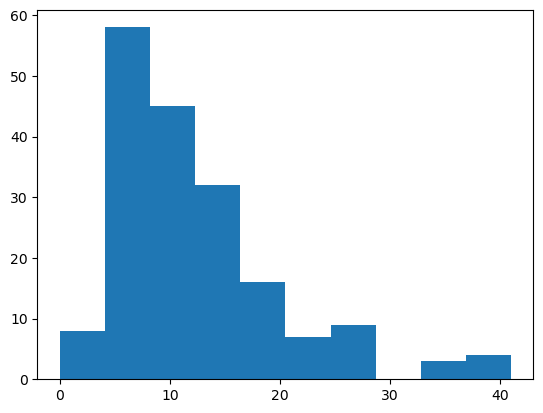

In [19]:
plt.hist(data['fare_amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x137957335d0>,
 'caps': [<matplotlib.lines.Line2D at 0x13795741250>,
 'boxes': [<matplotlib.lines.Line2D at 0x13795732990>],
 'medians': [<matplotlib.lines.Line2D at 0x13795742950>],
 'fliers': [<matplotlib.lines.Line2D at 0x13795743490>],
 'means': []}

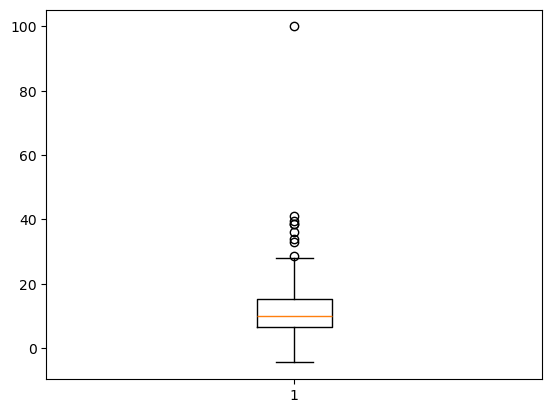

In [20]:
# checkinfg outliers
plt.boxplot(data['fare_amount'])

remove outloiers

In [20]:
for col in ['fare_amount','trip_distance','duration']:
    q1 =data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    IQR=q3-q1

    lower_bound =q1-1.5*IQR
    upper_bound =q3+1.5*IQR

    data= data[(data[col]>=lower_bound) & (data[col]<=upper_bound)]
    

In [23]:
data

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,0 days 00:05:00
1,1,Card,7.0,1.20,0 days 00:08:00
2,1,Card,6.0,0.60,0 days 00:06:00
3,1,Card,5.5,0.80,0 days 00:05:00
4,1,Cash,3.5,0.00,0 days 00:03:00
...,...,...,...,...,...
182,1,Cash,15.0,3.57,0 days 00:18:00
184,2,Card,10.5,2.10,0 days 00:13:00
185,2,Cash,6.5,1.30,0 days 00:07:00
186,1,Cash,14.0,4.10,0 days 00:14:00


plot histogram 

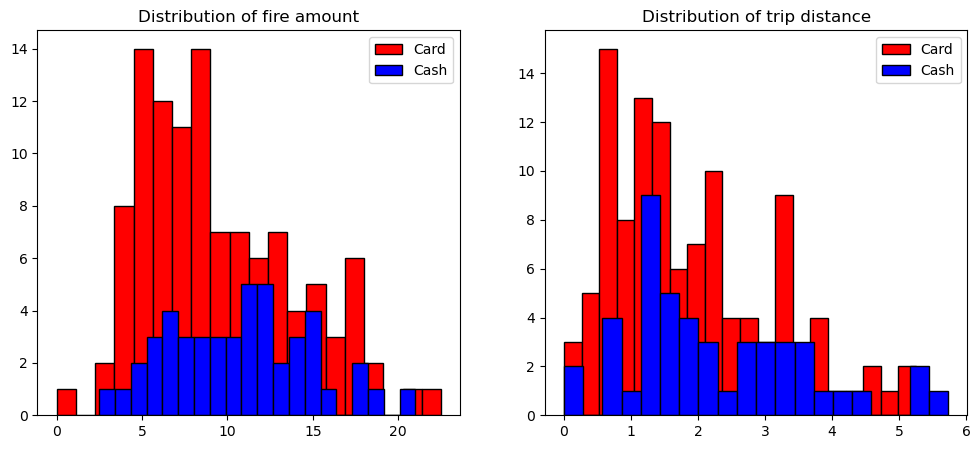

In [21]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of fire amount')
plt.hist(data[data['payment_type'] =='Card']['fare_amount'],histtype='barstacked' ,bins=20,edgecolor='k',color='red',label='Card')
plt.hist(data[data['payment_type'] =='Cash']['fare_amount'],histtype='barstacked',bins=20,edgecolor='k',color='blue',label='Cash')
plt.legend()

plt.subplot(1,2,2)
plt.title('Distribution of trip distance')
plt.hist(data[data['payment_type'] =='Card']['trip_distance'],histtype='barstacked' ,bins=20,edgecolor='k',color='red',label='Card')
plt.hist(data[data['payment_type'] =='Cash']['trip_distance'],histtype='barstacked',bins=20,edgecolor='k',color='blue',label='Cash')
plt.legend()
plt.show()


calculate mean of fare amount

In [22]:
data.groupby('payment_type').agg({'fare_amount':['mean','std'],'trip_distance':['mean','std']})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card            9.554144  4.531691      1.880000  1.207305
Cash           10.755319  4.266747      2.256596  1.353995

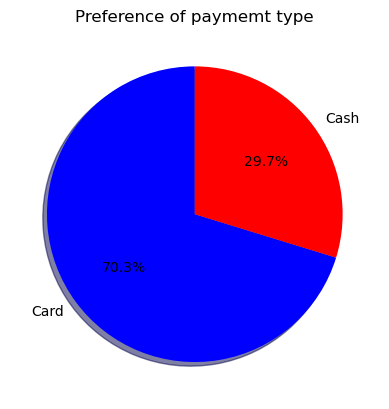

In [23]:
plt.title('Preference of paymemt type')
plt.pie(data['payment_type'].value_counts(normalize =True),labels=data['payment_type'].value_counts().index,
      startangle =90,shadow =True ,autopct= '%1.1f%%',colors=['blue','red'])
plt.show()
                    

then we plot passenger_count and fare_amount payment 

In [24]:
passenger_count=data.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns ={'passenger_count':'count'},inplace=True)
passenger_count.reset_index(inplace=True)

passenger_count['perc']=(passenger_count['count']/passenger_count['count'].sum())*100
passenger_count

,payment_type,passenger_count,count,perc
0,Card,1,68,43.037975
1,Card,2,27,17.088608
2,Card,3,11,6.962025
3,Card,4,5,3.164557
4,Cash,1,27,17.088608
5,Cash,2,10,6.329114
6,Cash,3,8,5.063291
7,Cash,4,2,1.265823


transfrome dataset 

In [25]:
data=pd.DataFrame(columns =['payment_type',1,2,3,4])
data['payment_type']=['Card','Cash']
data.iloc[0,1:]=passenger_count.iloc[0:4,-1]
data.iloc[1,1:]=passenger_count.iloc[4:,-1]
data




,payment_type,1,2,3,4
0,Card,43.037975,17.088608,6.962025,3.164557
1,Cash,17.088608,6.329114,5.063291,1.265823


create stack bar chart 
and passenger counts analysis

<Axes: ylabel='payment_type'>

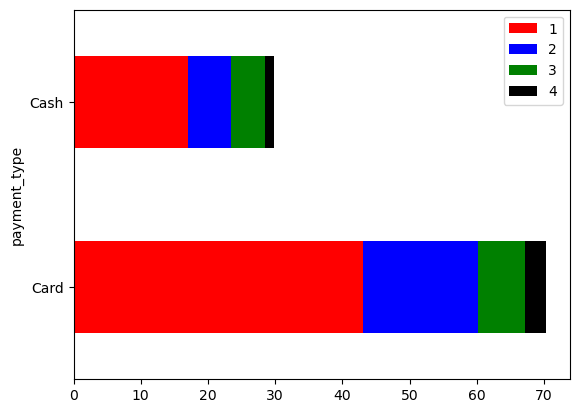

In [26]:
data.plot(x='payment_type', kind= 'barh' ,stacked=True ,color=['red','blue','green','black'])

# add percentage  text
# for p in ax.patches:
#     width =p.get_width()
#     height =p.get_height()
#     x,y =p.get_xy()
#     ax.text(x + width / 2,
#              y + height / 2,
#               '{:.0f}%'.format(width),
#               horizontalalignment='center',
#               verticalalignment='center')
         

Null hypothesis: There is no difference in average fare between customers who use credit cards and customers who use cash.

Attermative hypothesis: There is a difference in average fare between customers who use credit cards and customers who use cash


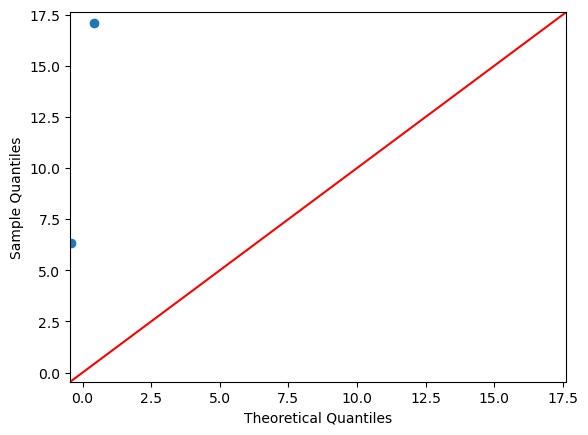

In [27]:
sm.qqplot(data[2] ,line ='45')
plt.show()

In [40]:
card_sample=data[data['payment_type']=='Card']['fare_amount']
cash_sample=data[data['payment_type']=='Cash']['fare_amount']
print(card_sample)
print(cash_sample)


Series([], Name: fare_amount, dtype: float64)
Series([], Name: fare_amount, dtype: float64)


In [31]:
from scipy import stats
t_stats, p_value = stats.ttest_ind(data['payment_type'],data['fare_amount'])

# Print the results
print('T statistic:', t_stats, 'p-value:', p_value)	

T statistic: -15.123741034596272 p-value: 1.1697743863527625e-40


In [ ]:
# perform 2 sample testing between paument_type and fare_amount
# then we got p_value and t statistic value  Here 
#the p-value is smaller than aplha value i.e 5%  or 0.05 ,so claim made by null hypothesis  is rejected.
# and accept alternate hypothesis 